<a href="https://colab.research.google.com/github/maribel1985/Challenge_TelecomX/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom X - Análisis de Evasión de Clientes

He sido contratado como asistente de análisis de datos en Telecom X y formaré parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

El desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir del análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

# Extracción de datos

In [93]:
# Importa la biblioteca
import pandas as pd

In [94]:
# API
api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Cargar los datos directamente desde la API y los convierto a un DataFrame
df_telecom = pd.read_json(api_url)



#🔧 Transformación
Conocer el conjunto de datos

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

In [95]:
# Mostrar las primeras filas del DataFrame
df_telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [96]:
# Información general
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [97]:
# Tipo de datos por cada columna
df_telecom.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [98]:
df_telecom.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [99]:
# Extraer los datos de los diccionarios
customer_data = pd.json_normalize(df_telecom['customer'])
phone_data = pd.json_normalize(df_telecom['phone'])
internet_data = pd.json_normalize(df_telecom['internet'])
account_data = pd.json_normalize(df_telecom['account'])

In [100]:
# Concatenar nueva columna con la original
df_telecom_expanded = pd.concat([df_telecom[['customerID', 'Churn']], customer_data, phone_data, internet_data, account_data], axis=1)

In [101]:
# Mostrar 5 primeros resultados del nuevo DataFrame
df_telecom_expanded.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [102]:
df_telecom_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [103]:
df_telecom_expanded.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

## **Comprobación de incoherencias en los datos**

In [104]:
# Verificar valores ausentes
print("\nValores ausentes por columna:")
print(df_telecom_expanded.isnull().sum())


Valores ausentes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [105]:
# Verificar filas duplicadas
print("\nNúmero de filas duplicadas:")
print(df_telecom_expanded.duplicated().sum())


Número de filas duplicadas:
0


In [106]:
# Verificar valores únicos en columnas categóricas para identificar inconsistencias
columnas_categoricas = df_telecom_expanded.select_dtypes(include='object').columns
print("\nValores únicos en columnas categóricas:")
for col in columnas_categoricas:
    print(f"- {col}: {df_telecom_expanded[col].unique()}")


Valores únicos en columnas categóricas:
- customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
- Churn: ['No' 'Yes' '']
- gender: ['Female' 'Male']
- Partner: ['Yes' 'No']
- Dependents: ['Yes' 'No']
- PhoneService: ['Yes' 'No']
- MultipleLines: ['No' 'Yes' 'No phone service']
- InternetService: ['DSL' 'Fiber optic' 'No']
- OnlineSecurity: ['No' 'Yes' 'No internet service']
- OnlineBackup: ['Yes' 'No' 'No internet service']
- DeviceProtection: ['No' 'Yes' 'No internet service']
- TechSupport: ['Yes' 'No' 'No internet service']
- StreamingTV: ['Yes' 'No' 'No internet service']
- StreamingMovies: ['No' 'Yes' 'No internet service']
- Contract: ['One year' 'Month-to-month' 'Two year']
- PaperlessBilling: ['Yes' 'No']
- PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
- Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


## **Manejo de inconsistencias**

In [107]:
# Verificar el tipo de datos de las columnas numéricas y buscar posibles errores de formato
columnas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']
print("\nTipos de datos de columnas numéricas:")
print(df_telecom_expanded[columnas_numericas].dtypes)


Tipos de datos de columnas numéricas:
tenure               int64
Charges.Monthly    float64
Charges.Total       object
dtype: object


In [165]:
# Convert the data type of the 'Charges.Total' column to numeric, coercing errors to NaN
df_telecom_expanded['Charges.Total'] = pd.to_numeric(df_telecom_expanded['Charges.Total'], errors='coerce')

# Identify rows with NaN values in 'Charges.Total' after coercion
invalid_charges_total = df_telecom_expanded[df_telecom_expanded['Charges.Total'].isna()]

if not invalid_charges_total.empty:
    print("\nRows with invalid (converted to NaN) values in 'Charges.Total':")
    print(invalid_charges_total)
    print(f"\nNumber of rows with invalid 'Charges.Total' values: {len(invalid_charges_total)}")

    # Drop rows where 'Charges.Total' is NaN
    df_telecom_expanded.dropna(subset=['Charges.Total'], inplace=True)
    print(f"\nDropped {len(invalid_charges_total)} rows with invalid 'Charges.Total' values.")

print("\n'Charges.Total' column data type after conversion and dropping NaNs:")
print(df_telecom_expanded['Charges.Total'].dtype)

print("\nInfo of the DataFrame after dropping rows:")
df_telecom_expanded.info()


Rows with invalid (converted to NaN) values in 'Charges.Total':
      customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
975   1371-DWPAZ    0.0       1              0        1           1       0   
1775  2520-SGTTA    0.0       1              0        1           1       0   
1955  2775-SEFEE    0.0       0              0        0           1       0   
2075  2923-ARZLG    0.0       0              0        1           1       0   
2232  3115-CZMZD    0.0       0              0        0           1       0   
2308  3213-VVOLG    0.0       0              0        1           1       0   
2930  4075-WKNIU    0.0       1              0        1           1       0   
3134  4367-NUYAO    0.0       0              0        1           1       0   
3203  4472-LVYGI    0.0       1              0        1           1       0   
4169  5709-LVOEQ    0.0       1              0        1           1       0   
5599  7644-OMVMY    0.0       0              0        1           

In [109]:
df_telecom_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [110]:
# Resumen estadístico de columnas numéricas para detectar valores atípicos o errores
print("\nEstadísticas descriptivas de columnas numéricas: \n")
print(df_telecom_expanded[columnas_numericas].describe())


Estadísticas descriptivas de columnas numéricas: 

            tenure  Charges.Monthly
count  7267.000000      7267.000000
mean     32.346498        64.720098
std      24.571773        30.129572
min       0.000000        18.250000
25%       9.000000        35.425000
50%      29.000000        70.300000
75%      55.000000        89.875000
max      72.000000       118.750000


## **Crear columna de 'Cuentas diarias'**

In [111]:
df_telecom_expanded['Cuentas_Diarias'] = round(df_telecom_expanded['Charges.Monthly'] / 30, 2)
df_telecom_expanded

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


## **Estandarización y transformación de datos**

In [112]:
# Diccionario de mapeo para convertir 'Yes'/'No' a 1/0
binary_map = {'Yes': 1, 'No': 0}

# Handle empty strings in 'Churn' column before mapping
df_telecom_expanded['Churn'] = df_telecom_expanded['Churn'].replace('', pd.NA)

# Aplicar a columns with 'Yes'/'No' responses
cols_sino = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in cols_sino:
    df_telecom_expanded[col] = df_telecom_expanded[col].map(binary_map)
    # Fill NaN values after mapping with 0 (assuming empty or unmapped means the 'No' case)
    df_telecom_expanded[col] = df_telecom_expanded[col].fillna(0)

In [113]:
# Caso especial para 'gender' (Female/Male)
df_telecom_expanded['gender'] = df_telecom_expanded['gender'].map({'Female': 1, 'Male': 0})

In [114]:
# Verificación
print(df_telecom_expanded[['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']].head())

   Churn  gender  Partner  Dependents  PhoneService  PaperlessBilling
0    0.0       1        1           1             1                 1
1    0.0       0        0           0             1                 0
2    1.0       0        0           0             1                 1
3    1.0       0        1           0             1                 1
4    1.0       1        1           0             1                 1


#📊 Carga y análisis

## **Análisis descriptivo**

In [115]:
# Uso Describe para generar las estadísticas descriptivas de las variables numéricas
df_telecom_expanded.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.494289,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2.157292
std,0.437115,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,2.340000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,2.995000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.960000


## **Distribución de evasión**
En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [116]:
# Importar bibliotecas de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/tmp/ipython-input-117-2352085022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(data=df_telecom_expanded, x='Churn', palette=['#3498db', '#e74c3c'])


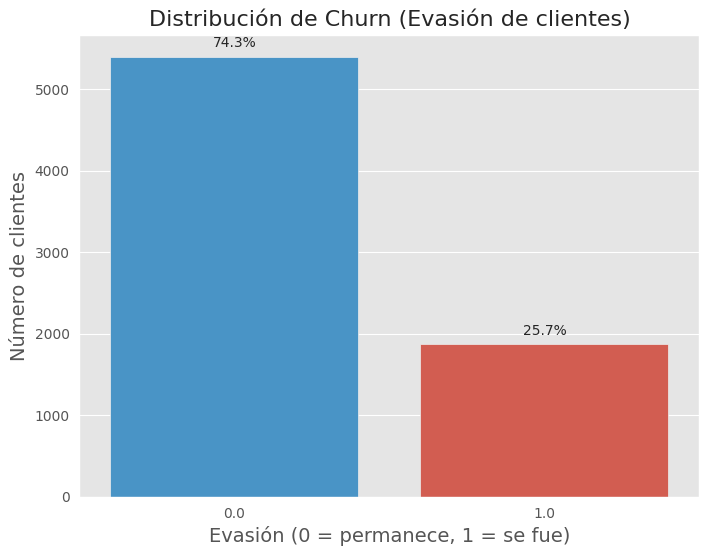

In [117]:
# Genero un gráfico de barras para hacer el conteo de clientes por Churn
plt.figure(figsize=(8, 6))
ax =sns.countplot(data=df_telecom_expanded, x='Churn', palette=['#3498db', '#e74c3c'])
plt.title('Distribución de Churn (Evasión de clientes)', fontsize=16)
plt.xlabel('Evasión (0 = permanece, 1 = se fue)', fontsize=14)
plt.ylabel('Número de clientes', fontsize=14)

# Agregar etiquetas con los porcentajes
total = len(df_telecom_expanded)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## **Recuento de evasión por variables categóricas**

#Telecom X - Análisis de Evasión de Clientes

He sido contratado como asistente de análisis de datos en Telecom X y formaré parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

El desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir del análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

# Extracción de datos

In [118]:
# Importa la biblioteca
import pandas as pd

In [119]:
# API
api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Cargar los datos directamente desde la API y los convierto a un DataFrame
df_telecom = pd.read_json(api_url)



#🔧 Transformación
Conocer el conjunto de datos

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

In [120]:
# Mostrar las primeras filas del DataFrame
df_telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [121]:
# Información general
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [122]:
# Tipo de datos por cada columna
df_telecom.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [123]:
df_telecom.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [124]:
# Extraer los datos de los diccionarios
customer_data = pd.json_normalize(df_telecom['customer'])
phone_data = pd.json_normalize(df_telecom['phone'])
internet_data = pd.json_normalize(df_telecom['internet'])
account_data = pd.json_normalize(df_telecom['account'])

In [125]:
# Concatenar nueva columna con la original
df_telecom_expanded = pd.concat([df_telecom[['customerID', 'Churn']], customer_data, phone_data, internet_data, account_data], axis=1)

In [126]:
# Mostrar 5 primeros resultados del nuevo DataFrame
df_telecom_expanded.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [127]:
df_telecom_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [128]:
df_telecom_expanded.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

## **Comprobación de incoherencias en los datos**

In [129]:
# Verificar valores ausentes
print("\nValores ausentes por columna:")
print(df_telecom_expanded.isnull().sum())


Valores ausentes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [130]:
# Verificar filas duplicadas
print("\nNúmero de filas duplicadas:")
print(df_telecom_expanded.duplicated().sum())


Número de filas duplicadas:
0


In [131]:
# Verificar valores únicos en columnas categóricas para identificar inconsistencias
columnas_categoricas = df_telecom_expanded.select_dtypes(include='object').columns
print("\nValores únicos en columnas categóricas:")
for col in columnas_categoricas:
    print(f"- {col}: {df_telecom_expanded[col].unique()}")


Valores únicos en columnas categóricas:
- customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
- Churn: ['No' 'Yes' '']
- gender: ['Female' 'Male']
- Partner: ['Yes' 'No']
- Dependents: ['Yes' 'No']
- PhoneService: ['Yes' 'No']
- MultipleLines: ['No' 'Yes' 'No phone service']
- InternetService: ['DSL' 'Fiber optic' 'No']
- OnlineSecurity: ['No' 'Yes' 'No internet service']
- OnlineBackup: ['Yes' 'No' 'No internet service']
- DeviceProtection: ['No' 'Yes' 'No internet service']
- TechSupport: ['Yes' 'No' 'No internet service']
- StreamingTV: ['Yes' 'No' 'No internet service']
- StreamingMovies: ['No' 'Yes' 'No internet service']
- Contract: ['One year' 'Month-to-month' 'Two year']
- PaperlessBilling: ['Yes' 'No']
- PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
- Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


## **Manejo de inconsistencias**

In [132]:
# Verificar el tipo de datos de las columnas numéricas y buscar posibles errores de formato
columnas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']
print("\nTipos de datos de columnas numéricas:")
print(df_telecom_expanded[columnas_numericas].dtypes)


Tipos de datos de columnas numéricas:
tenure               int64
Charges.Monthly    float64
Charges.Total       object
dtype: object


In [133]:
# Convertir el tipo de dato de la columna 'Charges.Total' a numérico para identificar errores de formato
# Los errores de formato en esta columna (como espacios en blanco) pueden causar problemas.
try:
    df_telecom_expanded['Charges.Total'] = pd.to_numeric(df_telecom_expanded['Charges.Total'])
    print("\nLa columna 'Charges.Total' se convirtió a numérico exitosamente.")

except ValueError as e:
    print(f"\nError al convertir 'Charges.Total' a numérico: {e}")
    print("Esto puede indicar la presencia de valores no numéricos (ej. espacios en blanco) en la columna.")
    # Identificar los valores que no se pudieron convertir
    invalid_charges_total = df_telecom_expanded[pd.to_numeric(df_telecom_expanded['Charges.Total'], errors='coerce').isna()]
    print("\nFilas con valores inválidos en 'Charges.Total':")
    print(invalid_charges_total)


Error al convertir 'Charges.Total' a numérico: Unable to parse string " " at position 975
Esto puede indicar la presencia de valores no numéricos (ej. espacios en blanco) en la columna.

Filas con valores inválidos en 'Charges.Total':
      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
975   1371-DWPAZ    No  Female              0     Yes        Yes       0   
1775  2520-SGTTA    No  Female              0     Yes        Yes       0   
1955  2775-SEFEE    No    Male              0      No        Yes       0   
2075  2923-ARZLG    No    Male              0     Yes        Yes       0   
2232  3115-CZMZD    No    Male              0      No        Yes       0   
2308  3213-VVOLG    No    Male              0     Yes        Yes       0   
2930  4075-WKNIU    No  Female              0     Yes        Yes       0   
3134  4367-NUYAO    No    Male              0     Yes        Yes       0   
3203  4472-LVYGI    No  Female              0     Yes        Yes       0   
4169

In [134]:
df_telecom_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [135]:
# Resumen estadístico de columnas numéricas para detectar valores atípicos o errores
print("\nEstadísticas descriptivas de columnas numéricas: \n")
print(df_telecom_expanded[columnas_numericas].describe())


Estadísticas descriptivas de columnas numéricas: 

            tenure  Charges.Monthly
count  7267.000000      7267.000000
mean     32.346498        64.720098
std      24.571773        30.129572
min       0.000000        18.250000
25%       9.000000        35.425000
50%      29.000000        70.300000
75%      55.000000        89.875000
max      72.000000       118.750000


## **Crear columna de 'Cuentas diarias'**

In [136]:
df_telecom_expanded['Cuentas_Diarias'] = round(df_telecom_expanded['Charges.Monthly'] / 30, 2)
df_telecom_expanded

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


## **Estandarización y transformación de datos**

In [137]:
# Diccionario de mapeo para convertir 'Yes'/'No' a 1/0
binary_map = {'Yes': 1, 'No': 0}

# Handle empty strings in 'Churn' column before mapping
df_telecom_expanded['Churn'] = df_telecom_expanded['Churn'].replace('', pd.NA)

# Aplicar a columns with 'Yes'/'No' responses
cols_sino = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in cols_sino:
    df_telecom_expanded[col] = df_telecom_expanded[col].map(binary_map)
    # Fill NaN values after mapping with 0 (assuming empty or unmapped means the 'No' case)
    df_telecom_expanded[col] = df_telecom_expanded[col].fillna(0)

In [138]:
# Caso especial para 'gender' (Female/Male)
df_telecom_expanded['gender'] = df_telecom_expanded['gender'].map({'Female': 1, 'Male': 0})

In [139]:
# Verificación
print(df_telecom_expanded[['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']].head())

   Churn  gender  Partner  Dependents  PhoneService  PaperlessBilling
0    0.0       1        1           1             1                 1
1    0.0       0        0           0             1                 0
2    1.0       0        0           0             1                 1
3    1.0       0        1           0             1                 1
4    1.0       1        1           0             1                 1


#📊 Carga y análisis

## **Análisis descriptivo**

In [140]:
# Uso Describe para generar las estadísticas descriptivas de las variables numéricas
df_telecom_expanded.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.494289,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2.157292
std,0.437115,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,2.340000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,2.995000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.960000


## **Distribución de evasión**
En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [141]:
# Importar bibliotecas de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


/tmp/ipython-input-142-1138082045.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(data=df_telecom_expanded, x='Churn', palette=['#3498db', '#8B0000'])


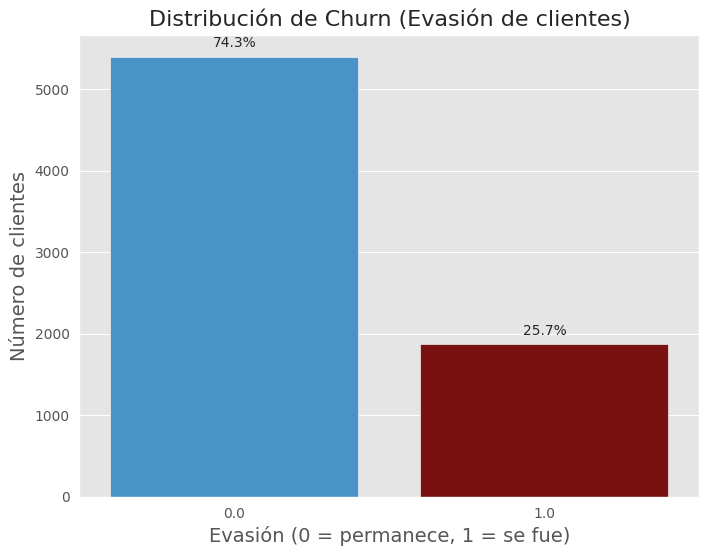

In [142]:
# Genero un gráfico de barras para hacer el conteo de clientes por Churn
plt.figure(figsize=(8, 6))
ax =sns.countplot(data=df_telecom_expanded, x='Churn', palette=['#3498db', '#8B0000'])
plt.title('Distribución de Churn (Evasión de clientes)', fontsize=16)
plt.xlabel('Evasión (0 = permanece, 1 = se fue)', fontsize=14)
plt.ylabel('Número de clientes', fontsize=14)

# Agregar etiquetas con los porcentajes
total = len(df_telecom_expanded)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## **Recuento de evasión por variables categóricas**

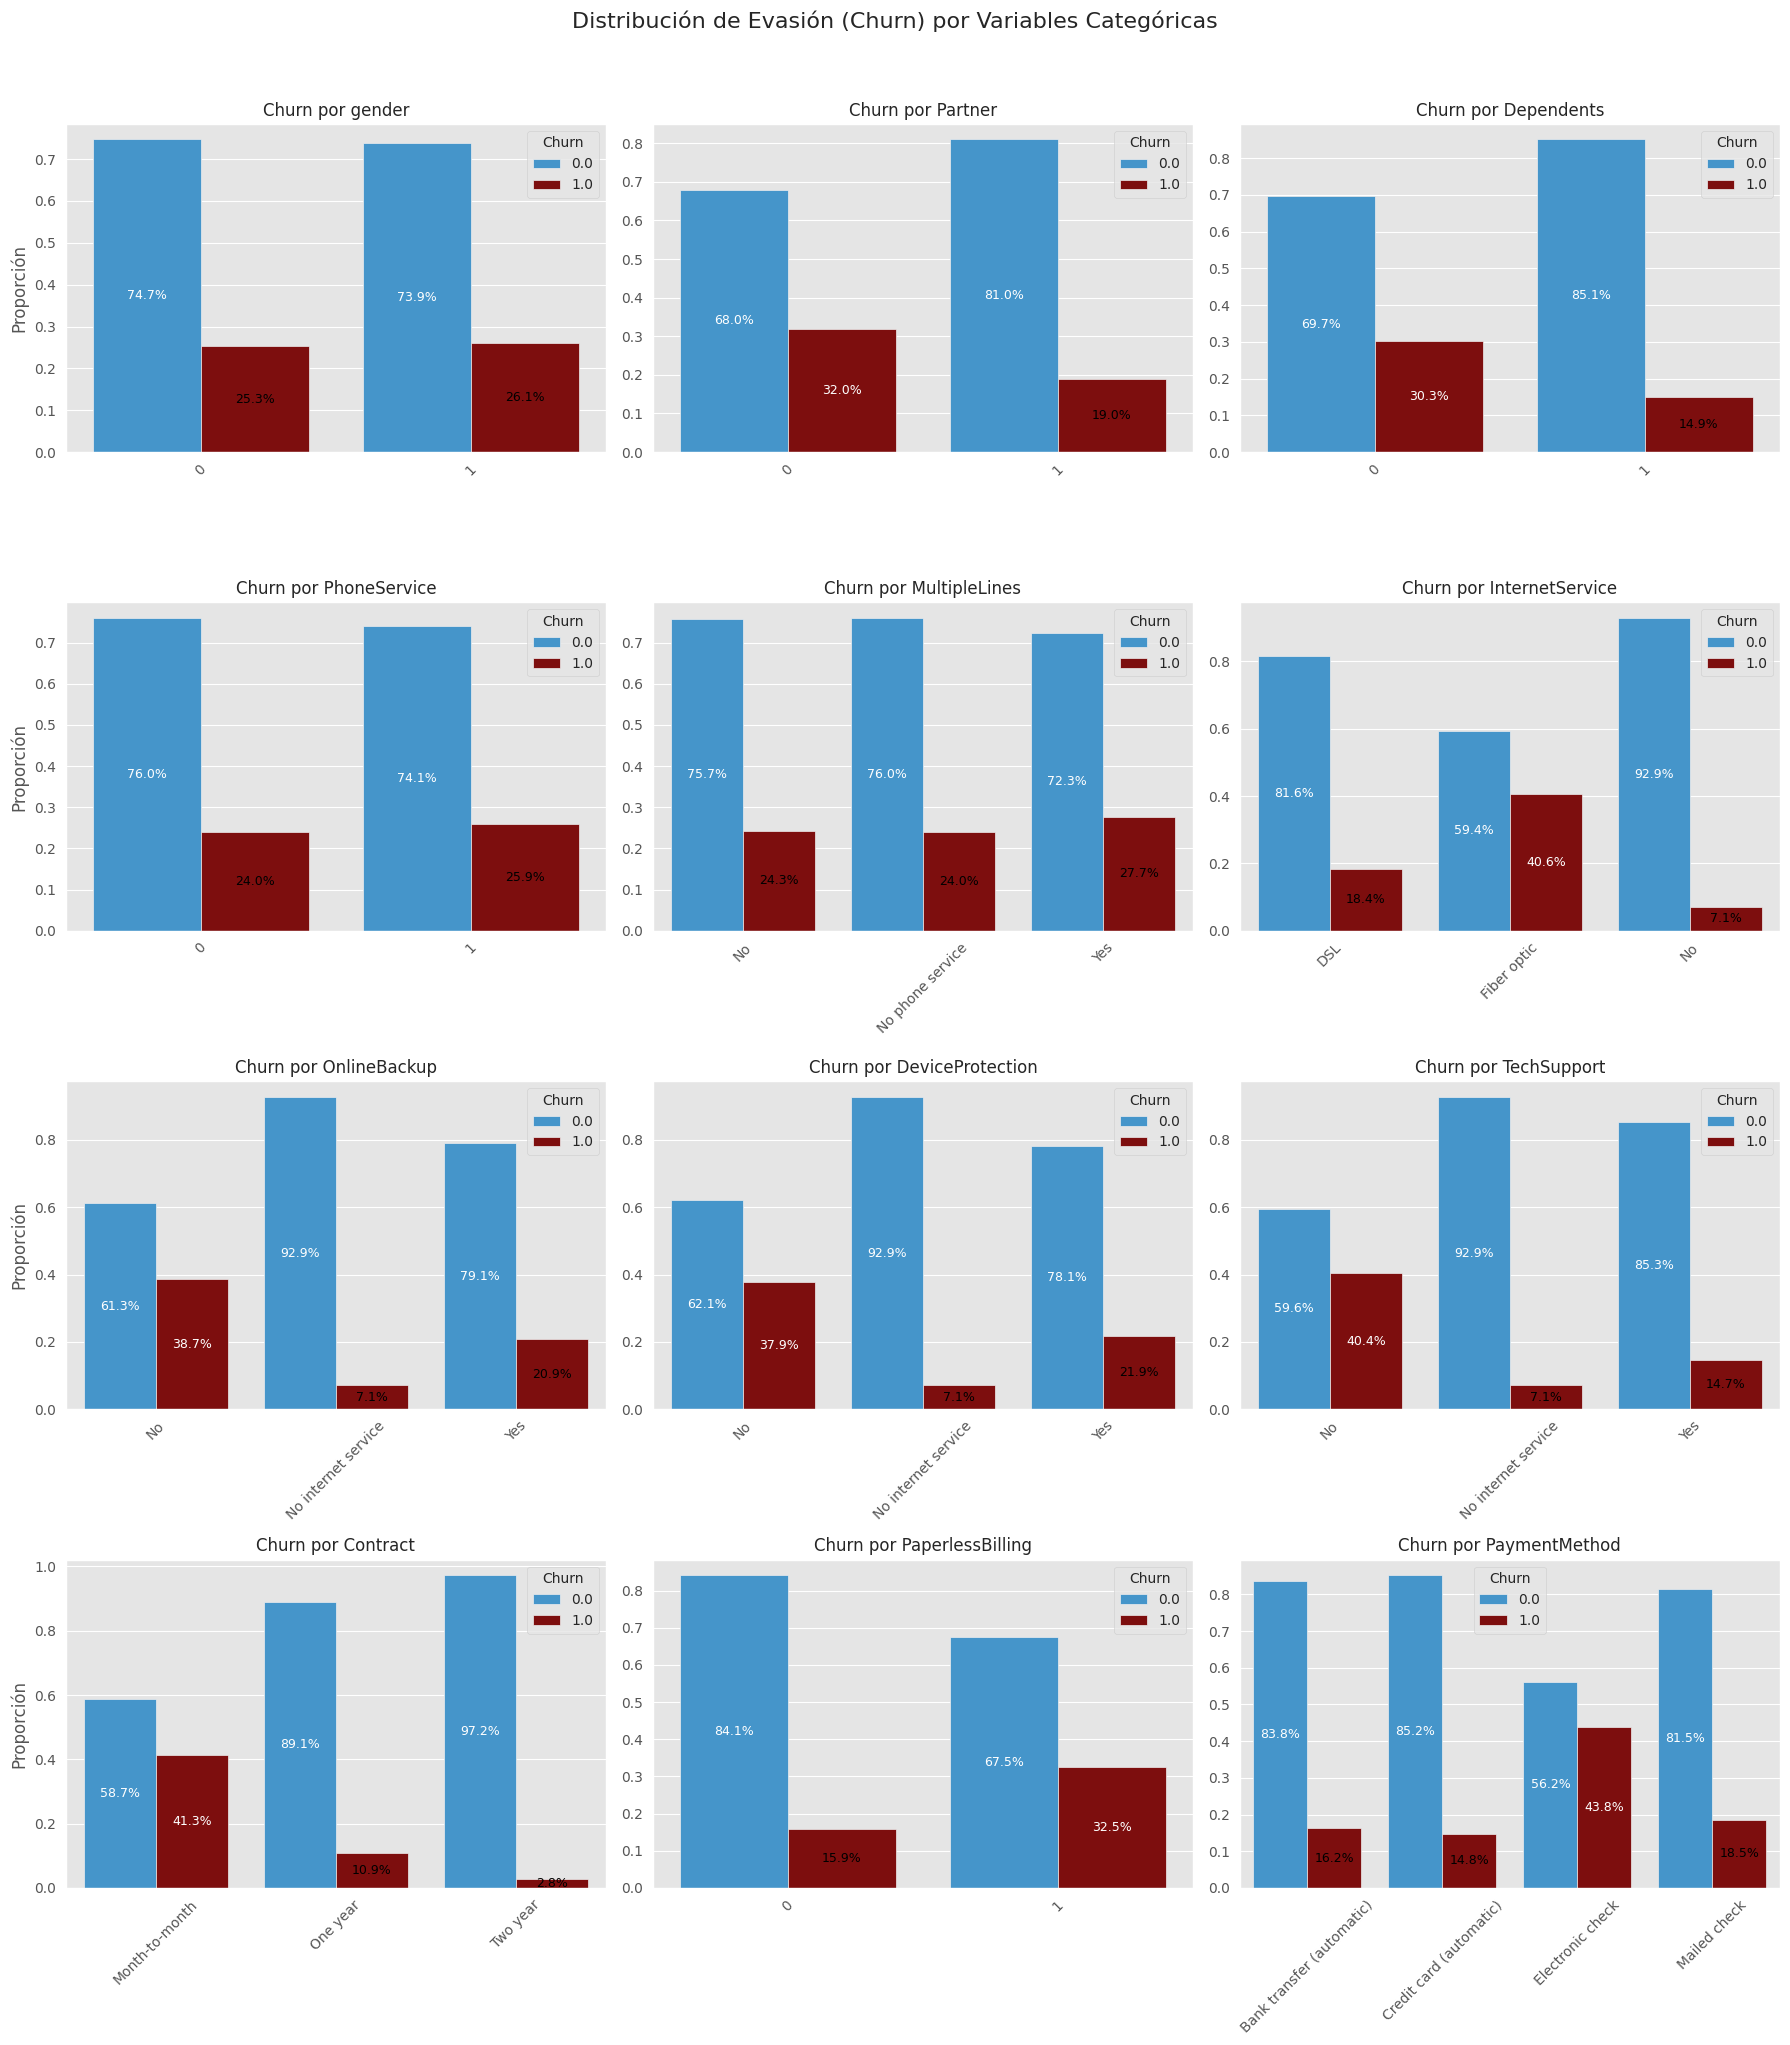

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo mejorada
plt.style.use('ggplot')
sns.set_palette(["#3498db", "#8B0000"])  # Azul para No Churn, Rojo para Churn

# Variables categóricas a analizar
variables = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'Contract', 'PaperlessBilling', 'PaymentMethod']

# Creamos una figura con subgráficos
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
fig.suptitle('Distribución de Evasión (Churn) por Variables Categóricas',
             fontsize=16, y=1.02)

# Aplanamos los ejes para facilitar el acceso
axes = axes.flatten()

for i, var in enumerate(variables):
    # 1. Calculamos los porcentajes
    prop_data = (df_telecom_expanded.groupby(var)['Churn']
                .value_counts(normalize=True)
                .rename('Proporción')
                .reset_index())

    # 2. Gráfico de barras
    sns.barplot(data=prop_data, x=var, y='Proporción', hue='Churn',
                ax=axes[i], saturation=0.8)

    # 3. Personalización
    axes[i].set_title(f'Churn por {var}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Proporción' if i%3==0 else '')
    axes[i].tick_params(axis='x', rotation=45)

    # 4. Agregar etiquetas de porcentaje
    for p in axes[i].patches:
        height = p.get_height()
        if height > 0:
            axes[i].text(p.get_x() + p.get_width()/2., height/2,
                        f'{height*100:.1f}%', ha='center', va='center',
                        color='white' if height > 0.3 else 'black', fontsize=9)

# Ajustamos el layout y mostramos
plt.tight_layout()
plt.show()

## **Conteo de evasión por variables numéricas**

/tmp/ipython-input-158-261041997.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom_expanded, x='Churn', y=col, palette='viridis')


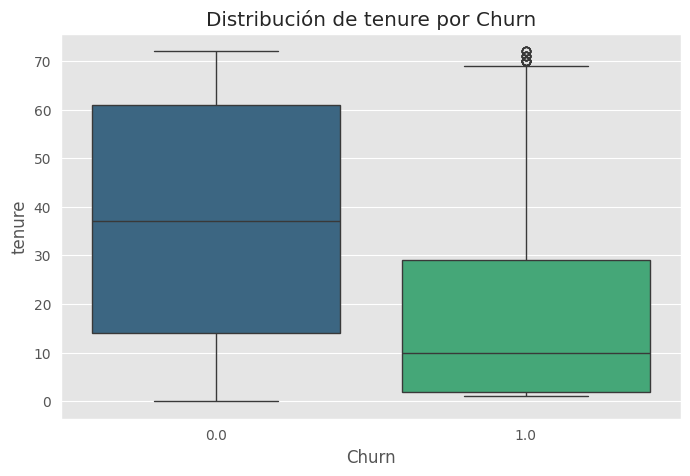

/tmp/ipython-input-158-261041997.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom_expanded, x='Churn', y=col, palette='viridis')


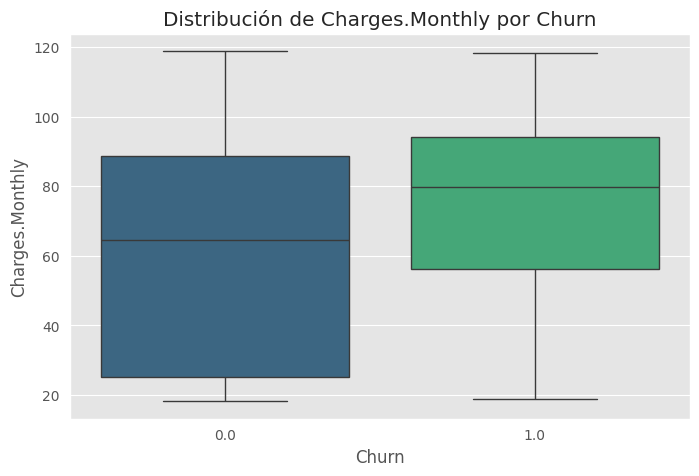

/tmp/ipython-input-158-261041997.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom_expanded, x='Churn', y=col, palette='viridis')


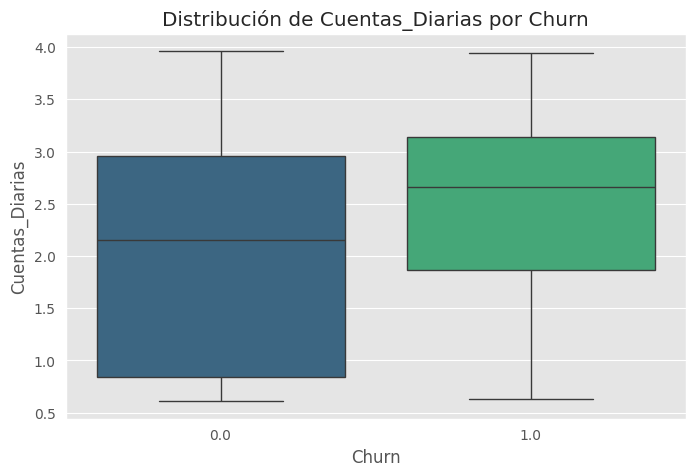

In [158]:
# Seleccionar las columnas numéricas relevantes
numerical_cols = ['tenure', 'Charges.Monthly', 'Cuentas_Diarias']

# Crear box plots para cada columna numérica mostrando la distribución por Churn
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_telecom_expanded, x='Churn', y=col, palette='viridis')
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()


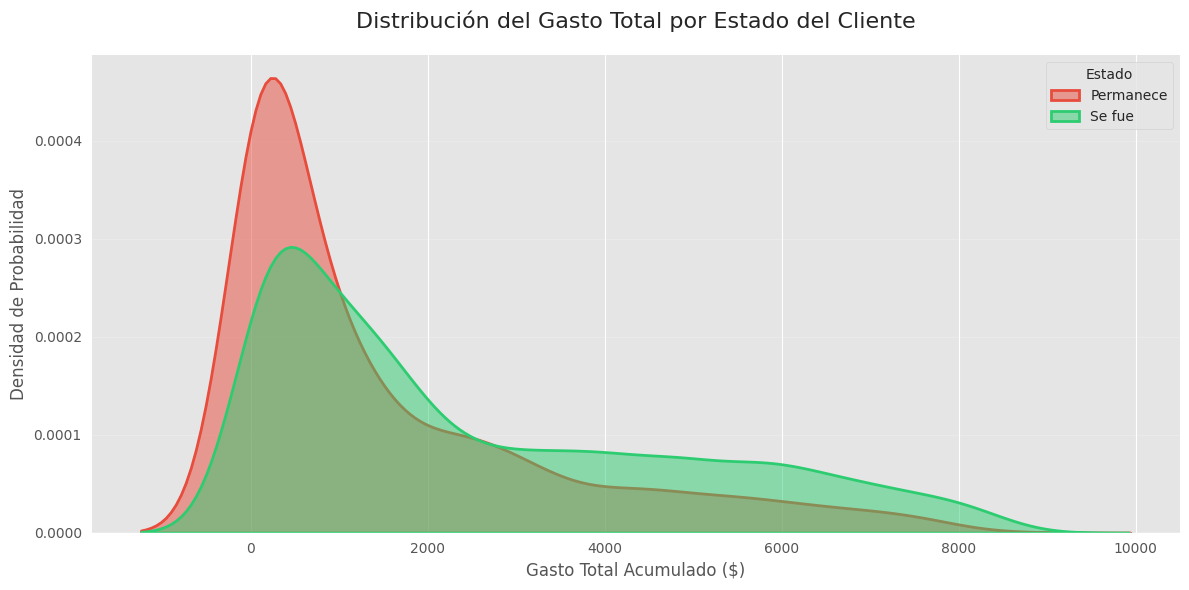

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo visual
plt.style.use('ggplot')
sns.set_palette(["#2ecc71", "#e74c3c"])  # Verde: Permanece, Rojo: Se fue

# Crear figura
plt.figure(figsize=(12, 6))

# Gráfico de densidad superpuesto
sns.kdeplot(data= df_telecom_expanded, x='Charges.Total', hue='Churn',
            fill=True, common_norm=False, alpha=0.5,
            linewidth=2, palette=["#2ecc71", "#e74c3c"])

# Personalización avanzada
plt.title('Distribución del Gasto Total por Estado del Cliente', fontsize=16, pad=20)
plt.xlabel('Gasto Total Acumulado ($)', fontsize=12)
plt.ylabel('Densidad de Probabilidad', fontsize=12)
plt.legend(title='Estado', labels=['Permanece', 'Se fue'], loc='upper right')



# Grid y ajustes finales
plt.grid(axis='y', alpha=0.2)
sns.despine(left=True)  # Quitar eje izquierdo para más limpieza
plt.tight_layout()
plt.show()

#📄Informe final